# Dataset

O dataset MNIST é um grande dataser de dígitos escrito a mão, onde o mesmo é bastante usado para trainamento de vários sistemas de processamento de imagens. Neste dataset os dígitos foram normalizados para uma escala branco-preto em um array quadrado de 28x28 pixels. O dataset contaim 60.000 imagens de treinamento e 10.000 imagens de teste. 

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ70VC0T_SWbbS-Lrl7XpHW5zhHFtD16EIJiVRah2h8ufMFYlVD)



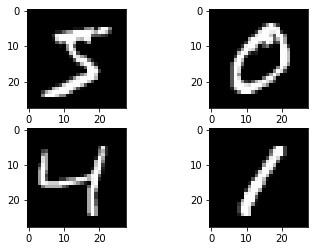

In [14]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()


plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

# Exemplo

Uma [aplicação](http://myselph.de/neuralNet.html) simples que utiliza redes neurais.

In [15]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-1.3.1-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

NameError: ignored

In [13]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

class Net(nn.Module):
    
    def __init__(self):
        
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 320)
        self.fc2 = nn.Linear(320, 50)
        self.fc3 = nn.Linear(50, 10)

    def forward(self, x):
        
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

def train(model, device, train_loader, optimizer, epoch):
    
    model.train()
    loss_list = list()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        curr_correct = pred.eq(target.view_as(pred)).sum().item()
        
        loss_list.append(100.0 * curr_correct / data.size(0))
        
        if batch_idx % 500 == 0:
            print('Train Epoch: {} [{}/{} ({:.2f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    return loss_list

def test(model, device, test_loader, epoch):
    
    model.eval()
    test_loss = 0
    correct = 0
    loss_list = list()
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            curr_loss = F.nll_loss(output, target, size_average=True)
            test_loss += curr_loss.item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            curr_correct = pred.eq(target.view_as(pred)).sum().item()
            correct += curr_correct
            
            if batch_idx % 500 == 0:
                print('Test Epoch: {} [{}/{} ({:.2f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(test_loader.dataset),
                    100. * batch_idx / len(test_loader), test_loss))

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    loss_list.append(100.0 * correct / len(test_loader.dataset))

    return loss_list

def main():
    
    # Training settings
    use_cuda = True #not args.no_cuda and torch.cuda.is_available()

    torch.manual_seed(12345)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=64, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=64, shuffle=True, **kwargs)


    model = Net().to(device)
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    loss_train = list()
    loss_test = list()
    
    for epoch in range(1, 20 + 1):
        
        trn = train(model, device, train_loader, optimizer, epoch)
        tst = test(model, device, test_loader, epoch)
        
        loss_train.extend(trn)
        loss_test.extend(tst)
        
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        
        ax[0].plot(np.asarray(loss_train))
        ax[0].set_ylim([0, 100])
        
        ax[1].plot(np.asarray(loss_test))
        ax[1].set_ylim([0, 100])
        
        plt.show()

if __name__ == '__main__':
    main()

NameError: ignored